In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [4]:
l = 50
l_spheroid = 2
dims = (l, l)
tmax = 250
restc = 3
rho_0 = 3
ecmdens = 0
adhesion = 0
nodes = np.zeros((l, l, restc+6), dtype=bool)
nodes[..., :l_spheroid, -rho_0:] = 1
lgca = get_lgca(geometry='hex', interaction='wetting', beta=adhesion, gamma=5., bc='rbc', density=0, alpha=1, restchannels=restc,
                nodes=nodes, 
                rho_0=rho_0)
lgca.r_b = .05
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+l_spheroid] = 1
lgca.ecm = 1 - lgca.spheroid.astype(float)
lgca.ecm *= ecmdens
# lgca.timestep()
lgca.timeevo(tmax, record=True, recordecm=True)

Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


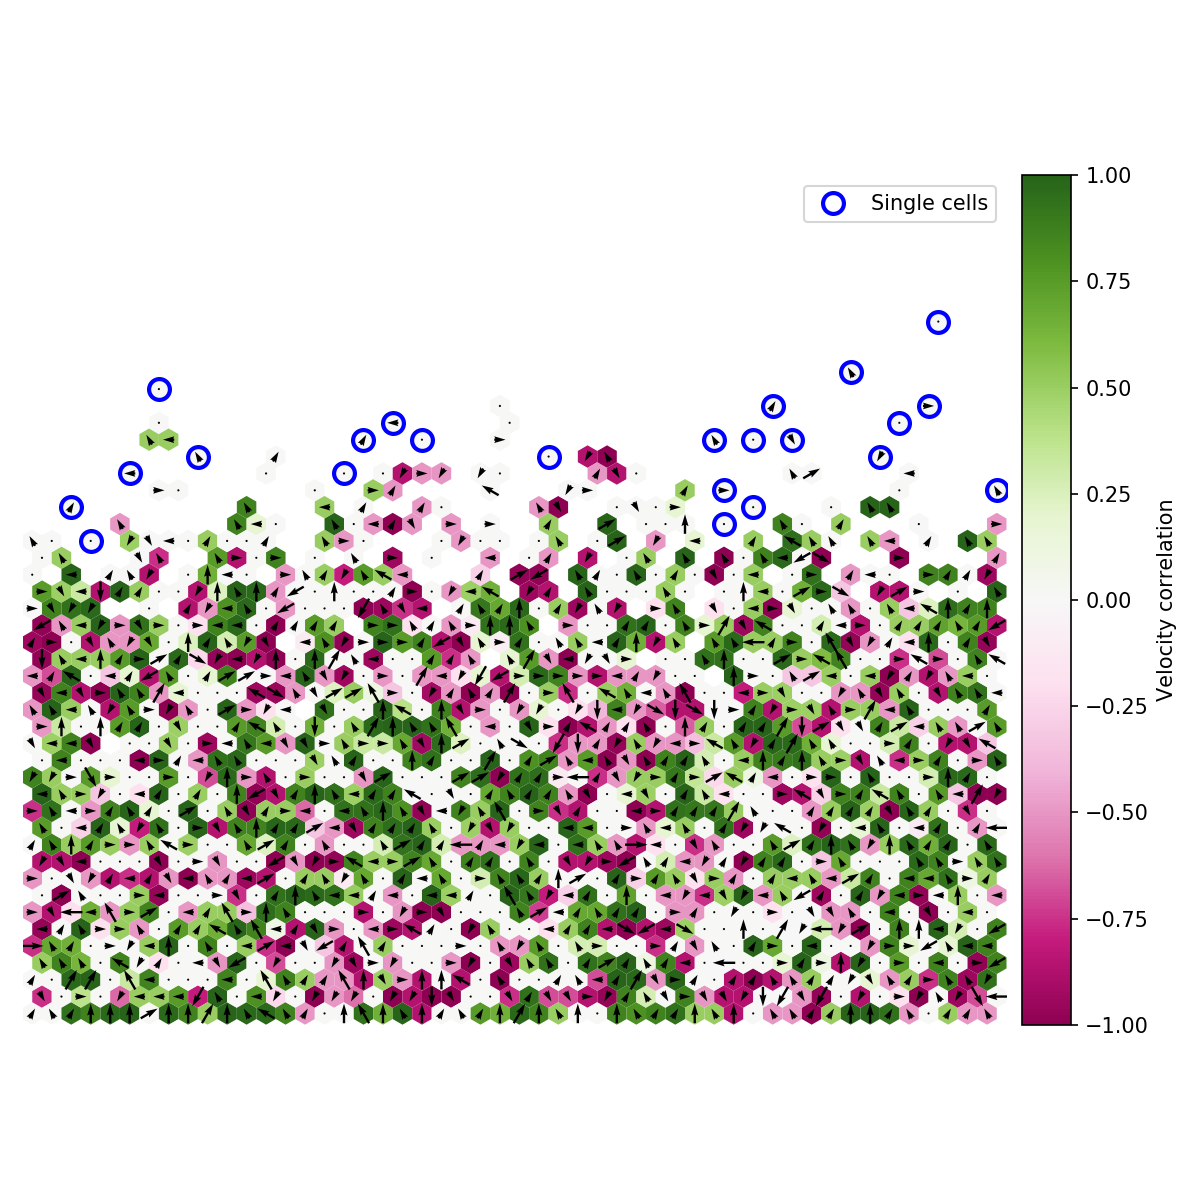

In [19]:
corrs = lgca.calc_velocity_correlation()
dens = lgca.cell_density[lgca.nonborder]
nbs = lgca.nb_sum(dens)
single_cell = ((nbs == 0) & (dens == 1))
# vorts = lgca.calc_vorticity()
_, corrplot, cmap = lgca.plot_scalarfield(corrs, cmap='PiYG', cbarlabel='Velocity correlation', vmin=-1, vmax=1, mask=lgca.cell_density[lgca.nonborder]>0,
                     cbar=True)
fig, flowplot = lgca.plot_flow(figindex=plt.gcf().number)
plt.plot(lgca.xcoords[single_cell], lgca.ycoords[single_cell], 'ob', ls='', mfc='none', ms=10, mew=2, label='Single cells')
#plt.scatter(lgca.xcoords[single_cell], lgca.ycoords[single_cell], s=100, fc='none', ec='b', lw=2, label='Single cells')
plt.legend(loc='upper right')
plt.axis('off')
plt.tight_layout()
# plt.savefig('figures/adhesion_{}_ecm_{}.svg'.format(adhesion, ecmdens), bbox_inches=0, transparent=True, dpi=600)

In [42]:
corrs_t = lgca.calc_velocity_correlation(lgca.nodes_t)
flux_t = lgca.calc_flux(lgca.nodes_t)
dens_t = lgca.dens_t
jx, jy = np.moveaxis(flux_t, -1, 0)
nbs = lgca.nb_sum(np.moveaxis(dens_t, 0, -1))
nbs = np.moveaxis(nbs, -1, 0)
single_cell = ((nbs == 0) & (dens_t == 1))


In [39]:
def update(n):
    title.set_text('Time k = {}'.format(n))
    corrplot.set(facecolor=cmap.to_rgba(corrs_t[n].ravel()))
    flowplot.set_UVC(jx[n], jy[n], dens_t[n])
    pointplot.set_data(lgca.xcoords[single_cell[n]], lgca.ycoords[single_cell[n]])
    return corrplot, flowplot, pointplot

In [22]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


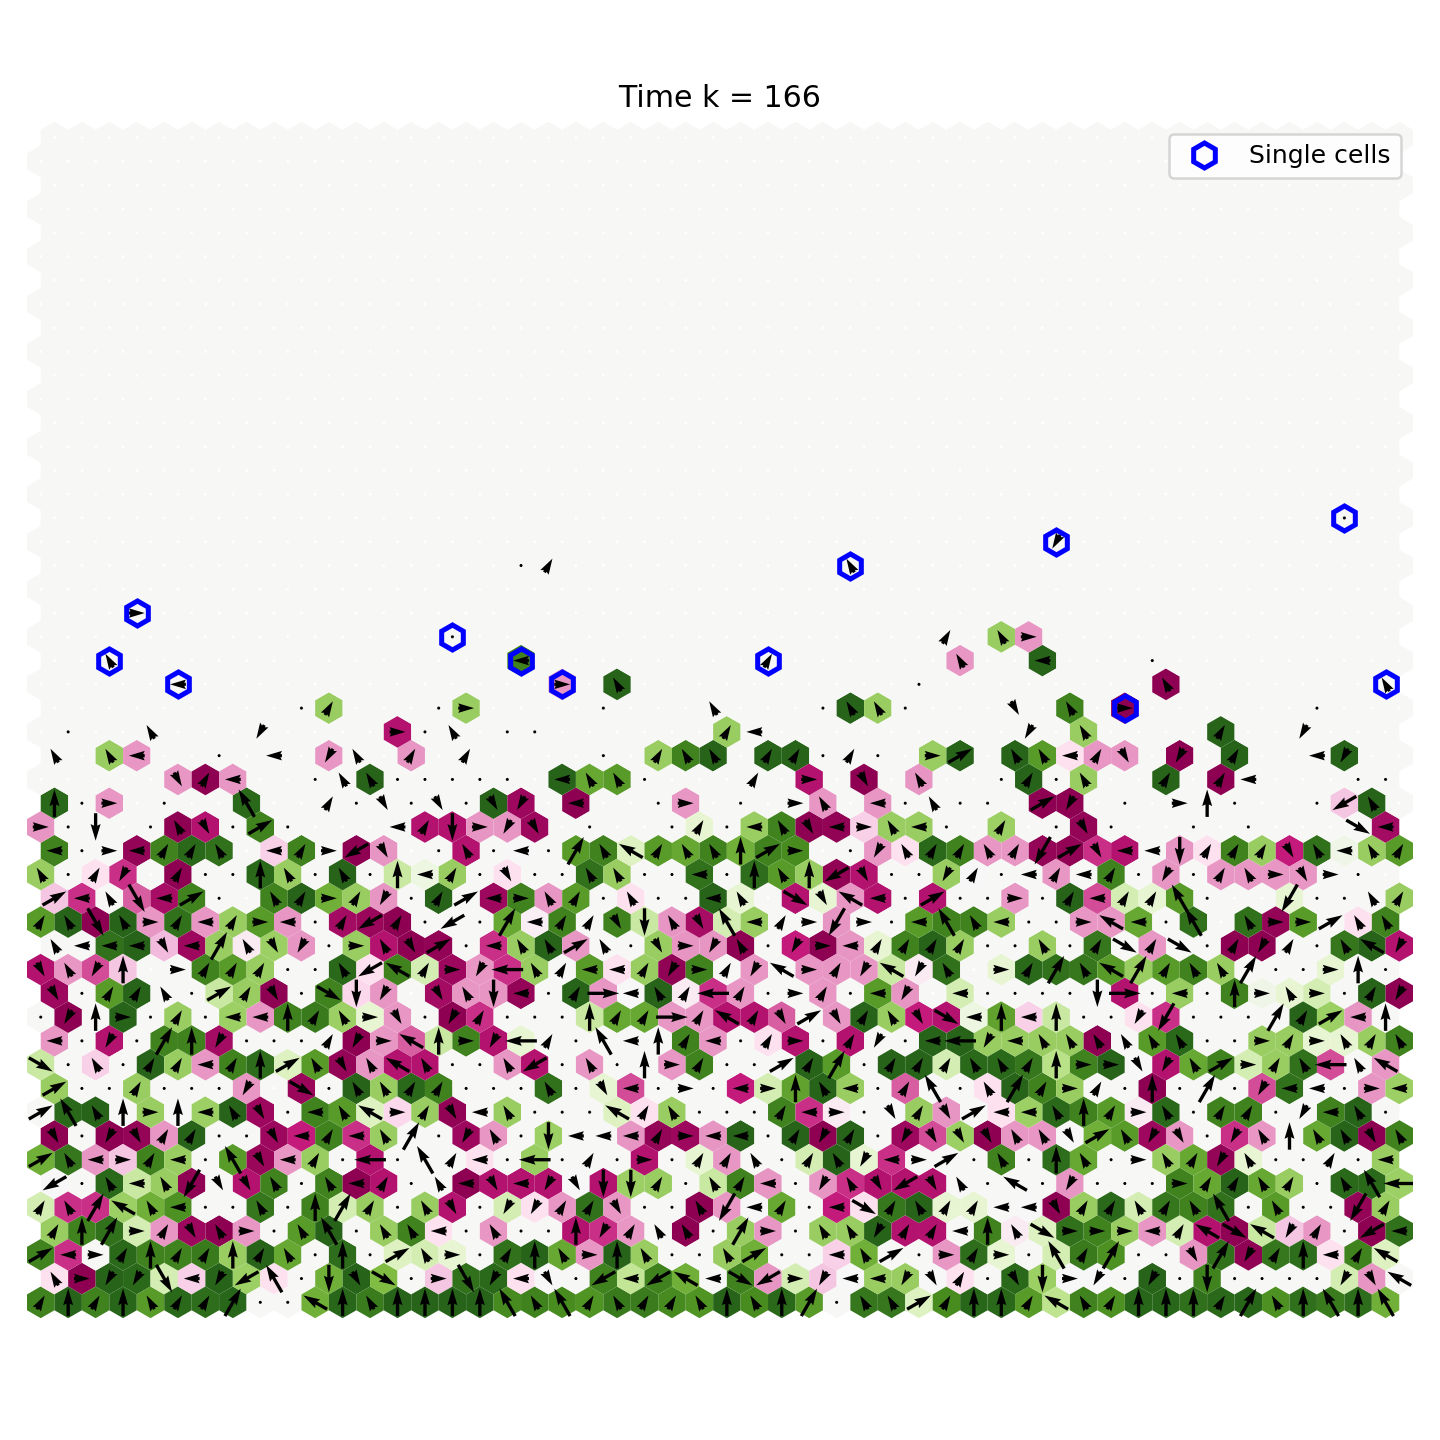

In [45]:
corrs = lgca.calc_velocity_correlation()
dens = lgca.cell_density[lgca.nonborder]
nbs = lgca.nb_sum(dens)

fig, corrplot, cmap = lgca.plot_scalarfield(corrs, cmap='PiYG', cbarlabel='Velocity correlation', vmin=-1, vmax=1, mask=lgca.cell_density[lgca.nonborder]>0,
                     cbar=False)
fig, flowplot = lgca.plot_flow(figindex=fig.number)
pointplot,  = plt.plot(lgca.xcoords[single_cell[0]], lgca.ycoords[single_cell[0]], 'hb', ls='', mfc='none', ms=10, mew=2, label='Single cells')
plt.legend(loc='upper right')
title = plt.title('Time k = 0')
plt.axis('off')
plt.tight_layout()


ani = animation.FuncAnimation(fig, update, interval=100, frames=dens_t.shape[0])
ani.save('movies/adhesion_{}_ecm_{}.avi'.format(adhesion, ecmdens))
#ani.save('test.avi'.format(adhesion, ecmdens))

<IPython.core.display.Javascript object>


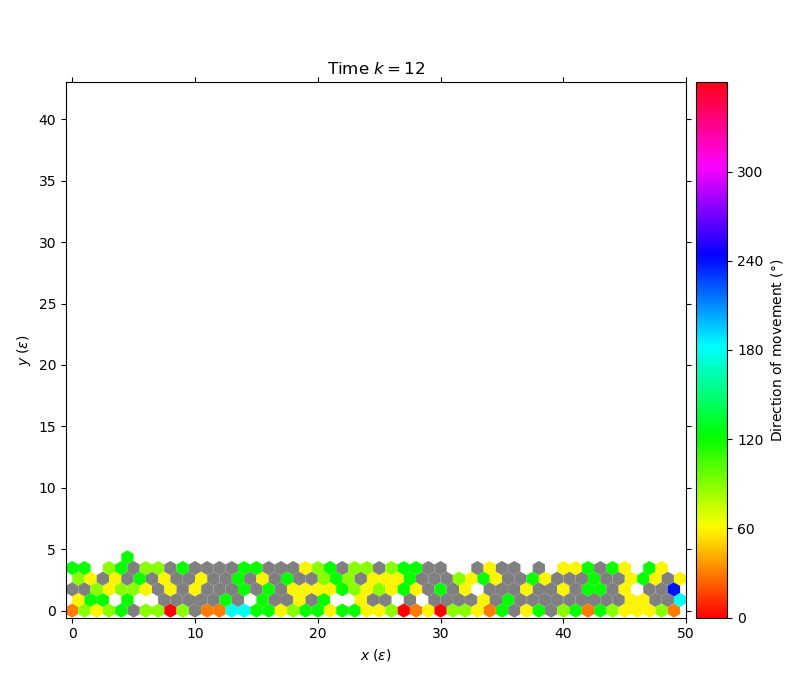

In [17]:
ani = lgca.animate_flux()
ani.save('movies/adhesion_{}_ecm_{}.avi'.format(adhesion, ecmdens))

In [ ]:
lgca.plot_scalarfield(lgca.ecm, cmap='Greys', cbarlabel='ECM density')
# plt.savefig('ecm_field_adhesion_{}_ecm_{}.pdf'.format(adhesion, ecmdens), bbox_inches='tight', transparent=True, dpi=600)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
ecmprofile = lgca.ecm[lgca.nonborder].mean(0)
ecmerr = lgca.ecm[lgca.nonborder].std(0)
densityprofile = lgca.cell_density[lgca.nonborder].mean(0)
denserr = lgca.cell_density[lgca.nonborder].std(0)
plt.errorbar(lgca.ycoords[0], ecmprofile, yerr=ecmerr/np.sqrt(l            cbar = fig.colorbar(cmap, extend='min', use_gridspec=True, cax=cax)
gca.lx), ls='--', marker='.', ms=15, lw=2, label='ECM density')
plt.errorbar(lgca.ycoords[0], densityprofile, yerr=denserr/np.sqrt(lgca.lx), ls='--', marker='.', ms=15, lw=2, label='Cell density')
# plt.gca().set_ylim(0, 10)
# plt.xticks(lgca.ycoords[0, ::2], densityprofile[::-1].cumsum()[::-2])
plt.gca().set_xlim(25, 35)

plt.xlabel('y')
# plt.ylabel('ECM density')
plt.legend(loc='right')
plt.tight_layout()
# plt.savefig('figures/ECM density.svg', bbox_inches='tight', transparent=True, dpi=600)

In [ ]:
record = np.moveaxis(lgca.nodes_t[25:], 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)

corrs = lgca.calc_velocity_correlation(record)
corr = np.mean(corrs[speed>0])
mean_speed = record[..., :lgca.velocitychannels].sum() / dens.sum()

nbs = lgca.nb_sum(dens)
single_cell = ((nbs == 0) & (dens == 1))
single_cell_num = single_cell.sum()

In [ ]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Single cells =', single_cell_num)

In [ ]:
dens.shape